###  Cartpole with Stable Baselines- a pre-trained agents used gymnasium environments

In [1]:
# pip install stable-baselines3[extra]
import gymnasium as gym
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt

# display management
from IPython.display import clear_output
from IPython.utils import io

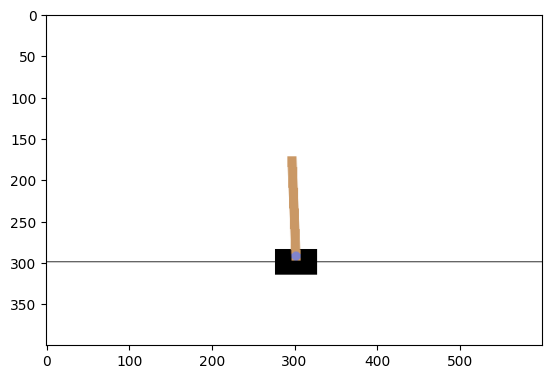

In [3]:
# Creating an environment for the game
env = gym.make("CartPole-v1", render_mode="rgb_array")

# visualize the environment
env.reset()
plt.imshow(env.render())

In [4]:
# create a custom callback in order to set a reward goal for the agent
# unfortunately there's no easier way to do this
class RewardThresholdCallback(BaseCallback):
    def __init__(self, reward_threshold, check_freq=1000, verbose=1):
        super().__init__(verbose)
        self.reward_threshold = reward_threshold
        self.check_freq = check_freq

    # override the on_step in the original model.learn
    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            mean_reward = self.locals["infos"][-1].get("episode", {}).get("r")

            # see if we have matched our reward goal
            if mean_reward is not None and mean_reward >= self.reward_threshold:
                print(f"Stop training -> Target reward {self.reward_threshold} reached!")

                # stop training
                return False
            
        # otherwise continue training
        return True

In [5]:
# create model and train
# there's plenty of options to finetune the parameters
# this is just more or less a basic implementation where we aim for
# 500 total rewards
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=300000, callback=RewardThresholdCallback(500))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.8     |
|    ep_rew_mean      | 31.8     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 765      |
|    time_elapsed     | 0        |
|    total_timesteps  | 127      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.526    |
|    n_updates        | 6        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.6     |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 717      |
|    time_elapsed     | 0        |
|    total_timesteps  | 229      |
| train/              |        

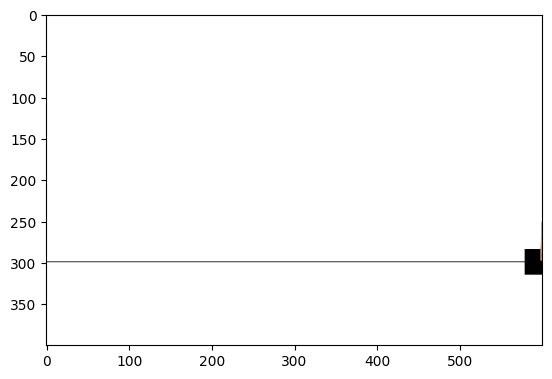

Total Reward: 171.0


In [6]:
# make a new environment for the test
env = gym.make("CartPole-v1", render_mode="rgb_array")
state, info = env.reset()
total_reward = 0

# play the environment
for step in range(1000):
    action, _ = model.predict(state, deterministic=True)
    state, reward, done, truncated, info = env.step(action)
    total_reward += reward

    # visualize frame
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

    if done:
        break

# print result
print(f"Total Reward: {total_reward}")

# it plays pretty well already!

#### I can confidently say that the Stable Baseline pretrained Agent did play the game well by balancing the Cartpole almost accurately towards the end of the game (to the right). At the total reward= 171.0. Also, it is not complex as compared to DQN or Classical Q-Learning.